api example. the code below can be executed remotely from a windows laptop.
1. adjust the pi_address below. 
2. run the cells one by one, pick what you need.

In [1]:
from PIL import Image
from io import BytesIO
import numpy as np
import requests
from pprint import pprint

# in usb mode:
# pi_address = 'raspberrypi.local'
# in network mode:
# pi_address = '10.61.100.177'
# ADJUST THIS LINE
pi_address = '10.61.100.177'

In [2]:
# get some info
r = requests.get(f'http://{pi_address}:8000/info')
#print(r.json()['sensor_modes'])
pprint(r.json()['cam_info'])
print('\n')
info = r.json()['sensor_modes']

for iter, data in enumerate(info):
   pprint(f'mode {iter} is {data}')



{'ColorFilterArrangement': 1,
 'Location': 2,
 'Model': 'mira016',
 'PixelArrayActiveAreas': ['(0, 0)/400x400'],
 'PixelArraySize': [400, 400],
 'Rotation': 0,
 'ScalerCropMaximum': [0, 0, 0, 0]}


("mode 0 is {'bit_depth': 10, 'crop_limits': [0, 0, 400, 400], "
 "'exposure_limits': [44, 444374, None], 'format': 'SGRBG10_CSI2P', 'fps': "
 "360.23, 'size': [400, 400], 'unpacked': 'SGRBG10'}")
("mode 1 is {'bit_depth': 12, 'crop_limits': [0, 0, 400, 400], "
 "'exposure_limits': [44, 444374, None], 'format': 'SGRBG12_CSI2P', 'fps': "
 "360.23, 'size': [400, 400], 'unpacked': 'SGRBG12'}")
("mode 2 is {'bit_depth': 8, 'crop_limits': [0, 0, 400, 400], "
 "'exposure_limits': [44, 444374, None], 'format': 'SGRBG8', 'fps': 360.23, "
 "'size': [400, 400], 'unpacked': 'SGRBG8'}")


In [12]:
# have a look at the current controls
r = requests.get(f'http://{pi_address}:8000/controls')
controls = r.json()
pprint(controls)


{'amount': 1,
 'analog_gain': '1',
 'apply': True,
 'cam_close': False,
 'cam_open': False,
 'download': False,
 'download_option': 'tiff',
 'exposure_us': '1000.00',
 'framerate': '30.00',
 'illumination': 'on',
 'mode': '0'}


In [13]:
# replace the current controls
controls['exposure_us']=300
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
pprint(r.content)


(b'{"amount":1,"analog_gain":"1","apply":true,"cam_close":false,"cam_open":fals'
 b'e,"download":false,"download_option":"tiff","exposure_us":300,"framerate":"3'
 b'0.00","illumination":"on","mode":"0"}\n')


In [24]:
# replace single controls
controls['exposure_us']=3000
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)

# replace single controls
controls['analog_gain']=1
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)
# replace single controls
controls['framerate']=5
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)
# replace single controls
controls['mode']=1
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)
# r = requests.get(f'http://{pi_address}:8000/index')
# print(r.content)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [10]:
# replace the current controls
controls['amount']=10
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
print(r.content)

b'{"amount":10,"analog_gain":1.1,"exposure_us":3000,"framerate":10,"illumination":true,"mode":1}\n'


In [27]:
import time
from numpy.lib.npyio import NpzFile 

r = requests.get(f'http://{pi_address}:8000/capturefast')
print(r.json)

ret = NpzFile(BytesIO(r.content), own_fid=True, allow_pickle=True)  
print(ret.files)  
""" ['A'] """  
print(ret['A'].shape)  
""" (10,400,400) """  
print(ret['A'])

<bound method Response.json of <Response [200]>>
['A']
(1, 400, 400)
[[[30 30 31 ... 23 24 25]
  [28 29 28 ... 25 24 24]
  [29 28 31 ... 23 25 26]
  ...
  [24 23 24 ... 23 23 23]
  [24 25 24 ... 24 24 23]
  [25 24 24 ... 24 24 25]]]


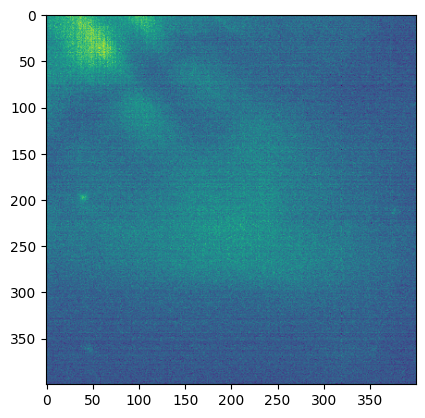

In [28]:
import matplotlib.pyplot as plt
plt.imshow(ret['A'][0])
plt.show()

In [29]:
#direct i2c access.
import subprocess
frames =100
t = time.time()
for i in range(frames):
    out = subprocess.check_output(r"i2cset -f -y 10 0x36 0x01 0xE5; i2cget -f -y 10 0x36", shell=True)
    t2 = time.time()

print("program output:", out)

print(t2-t)
print(f'regs per sec: {frames/(t2-t)}')



program output: b'0x13\n'
2.523787021636963
regs per sec: 39.62299478627901


exp_val = i2c.rwReg(addr=0xE000, value=0x0, rw=1, flag=0) # WRITE bank sel 0

exp_val_3 = i2c.rwReg(addr=0x193, value=0x44, rw=0, flag=0) # offset clipping registers 
exp_val_4 = i2c.rwReg(addr=0x194, value=0x16, rw=0, flag=0)

print(f'offsetclip value in hex:  {hex(exp_val_3)} {hex(exp_val_4)}')
print(f'offsetclip val in decimal: { 256* (exp_val_3) + (exp_val_4)}')

exp_val_3 = i2c.rwReg(addr=92, value=0, rw=0, flag=0) # offset clipping registers 
exp_val_4 = i2c.rwReg(addr=93, value=0, rw=0, flag=0)

print(f'offsetclip value in hex:  {hex(exp_val_3)} {hex(exp_val_4)}')
print(f'offsetclip val in decimal: { 256* (exp_val_3) + (exp_val_4)}')

In [ ]:
# WRITE REGISTER EXAMPLE
message = {"reg": "0xE000", "val": "0x0"}
r = requests.put(f'http://{pi_address}:8000/registers/write', json = message)
print(r.content)


# READ REGISTER EXAMPLE
message = {"reg": "0x193"}
r = requests.put(f'http://{pi_address}:8000/registers/read', json = message)
print(r.content)


# READ REGISTER EXAMPLE
message = {"reg": "0x194"}
r = requests.put(f'http://{pi_address}:8000/registers/read', json = message)
print(r.content)

In [ ]:
# WRITE REGISTER EXAMPLE
message = {"reg": "0x100d", "val": "0x2"}
r = requests.put(f'http://{pi_address}:8000/registers/write', json = message)
print(r.content)

# ENABLE MANUAL MODE (disable reg upload and reset)
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# DISABLE MANUAL MODE (disable reg upload and reset)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# ENABLE STREAM CONTROL (while in manual mode, still let picam2 write start/stop stream register)
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/stream_ctrl', json = message)
print(r.content)

# (default) DISABLE STREAM CONTROL (while in manual mode, user manually write start/stop stream register)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# DISABLE POWER EXAMPLE (reset pin)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/power', json = message)
print(r.content)

# ENABLE POWER EXAMPLE
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/power', json = message)
print(r.content)